<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/PROJETO_Data_Science_para_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Redução do turnover com Ciência de Dados

Turnover refere-se à taxa de rotatividade de funcionários em uma empresa durante um determinado período de tempo. Essa métrica calcula a porcentagem de funcionários que deixaram a organização (seja por demissão voluntária, demissão involuntária ou aposentadoria) e foram substituídos por novos funcionários dentro desse período. Nosso objetivo neste projeto é minimizar o turnover utilizando um modelo de classificação.


<center><img alt="Recursos Humanos" width="60%" src="https://img.freepik.com/fotos-gratis/homem-mostrando-seus-documentos-de-colegas-de-trabalho_23-2149330949.jpg?t=st=1715365978~exp=1715369578~hmac=120b68290f6b99be41a5287a0f86286f1eafc5230c5ff2b466e6249ebb6173d5&w=996
"></center>


## O Projeto
Vou utilizar a biblioteca Pycaret neste projeto, onde é possível testar vários modelos de Machine Learning ao mesmo tempo, assim podemos escolher o modelo que apresentar melhor desempenho.

Vou utilizar dados fornecidos pelo Kaggle. A ideia é desenvolver um modelo de Machine Learning para antecipar potenciais conflitos, auxiliando as empresas na adoção de medidas para reduzir esses impactos, melhorar o ambiente de trabalho e manter os talentos valiosos na organização.

In [26]:
#@title
# hide warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# installing scikit-plot
!pip install -q scikit-plot
#instalando o pycaret
!pip install pycaret[full]

In [27]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import pycaret
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


## Origem dos dados
Dados criados e disponibilizados por Cientistas De Dados da [IBM]('https://www.ibm.com/br-pt'), adquiridos através da plataforma de Ciência de Dados [Kaggle]('https://kaggle.com/').

In [28]:
# importando os dados
df= pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Data_Science_For_HR/master/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Dicionário de variáveis
Breve explicação das variáveis categóricas:

* Education
  * 1 'Below College'
  * 2 'College'
  * 3 'Bachelor'
  * 4 'Master'
  * 5 'Doctor'

* EnvironmentSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* JobInvolvement
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* JobSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* PerformanceRating
  * 1 'Low'
  * 2 'Good'
  * 3 'Excellent'
  * 4 'Outstanding'

* RelationshipSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* WorkLifeBalance
  * 1 'Bad'
  * 2 'Good'
  * 3 'Better'
  * 4 'Best'

In [29]:
# verificando as primeiras entradas
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
# verificando o tamanho do dataset
print("Informações Sobre o Dataset")
print("Variáveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}\n".format(df.shape[0]))
print("O dataset não apresenta dados ausentes:\n")

# identificando os tipos das variáveis
display(df.info())

Informações Sobre o Dataset
Variáveis:	 35
Entradas:	 1470

O dataset não apresenta dados ausentes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 

None

In [31]:
# distribuição estatística das variáveis
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Insights
Algumas informações básicas podem ser retiradas desta distribuição estatística, como por exemplo:

* A média de idade na empresa é de quase 37 anos de idade.
* A maioria dos funcionários possui Ensino Superior.
* Como se trata de um conjunto de dados oriundo dos Estados Unidos, consideramos os valores monetários como Dólar. Neste caso, o salário médio mensal da empresa é de US$6502.93.

In [32]:
# distribuição estatística das variáveis categóricas
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Insights
A variável 'Attrition' indica se há algum problema ou atrito no ambiente de trabalho do funcionário. Esta variável será utilizada como o alvo do nosso modelo de Machine Learning. No nosso conjunto de dados, ela representa a categoria mais proeminente de motivos para a saída de profissionais da empresa, sendo assim o nosso foco principal.

Com acesso a mais dados, teríamos a capacidade de empregar outros indicadores ou criar novas características que melhor representassem a probabilidade de um funcionário deixar a empresa.

Além disso, observamos que:
- A maioria dos funcionários não apresenta atritos.
- O departamento de Pesquisa e Desenvolvimento é o mais numeroso na empresa.
- Homens constituem a maioria dos funcionários na empresa.
- O cargo mais comum é o de Executivo de Vendas.
- A maioria dos funcionários é casada.
- A grande maioria dos funcionários não realiza horas extras.

## Igualdade de Gênero

<center><img alt="Recursos Humanos" width="65%" src="https://img.freepik.com/fotos-gratis/simbolos-de-genero-feminino-e-masculino-plana-leigos_23-2148419675.jpg?t=st=1715451137~exp=1715454737~hmac=a018cd7c0cda6b854460e852d1e0831832b4735c0e6fab1cd7ea377e5b4174ff&w=996"></center>


É muito importante estar atento a um tema como Igualdade de Gênero. Tendo acesso aos dados de salário e educação dos funcionários, é possível ver como se comparam os salários entre homens e mulheres.

In [33]:
# nível de educação por gênero
df.groupby(['Gender']).Education.value_counts(ascending=False)

Gender  Education
Female  3            235
        4            154
        2            117
        1             60
        5             22
Male    3            337
        4            244
        2            165
        1            110
        5             26
Name: count, dtype: int64

In [34]:
# distribuição estatística da renda mensal por gênero
df.groupby(['Gender']).MonthlyIncome.describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,6686.566327,4695.608507,1129.0,3037.0,5081.5,8711.75,19973.0
Male,882.0,6380.507937,4714.856577,1009.0,2819.5,4837.5,8113.75,19999.0


* Em média e em todos os quartis, exceto no valor máximo, as mulheres nesta empresa recebem salários mais altos do que os homens.
* Além disso, as mulheres tendem a possuir um nível educacional mais elevado em comparação com os homens, refletindo-se também em seus salários.

### Variável Alvo

Para que possamos entender e fazer operações com nossa variável alvo, precisamos transformá-la em valores numéricos. Vamos fazer isso usando a função abaixo:

In [35]:
# transformando a variável alvo
target_map = {'Yes':1, 'No':0}
# criando a coluna alvo
df["Attrition_numerical"] = df["Attrition"].apply(lambda x: target_map[x])

In [36]:
# checando a coluna criada
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [39]:
# checando a distribuição da variável alvo
print(df.Attrition_numerical.value_counts())
print("\nAtritos Representam {:.2f}% Do Dataset.\n".format((df[df.Attrition_numerical == 1].shape[0] / df.shape[0]) * 100))

Attrition_numerical
0    1233
1     237
Name: count, dtype: int64

Atritos Representam 16.12% Do Dataset.



#### Conclusões

Isso significa que 237 (16%) dos 1470 funcionários listados nesse conjunto de dados têm atritos.

Isso pode ser aceitável, dependendo dos indicadores da empresa, mas para nosso modelo de Machine Learning não é o ideal. A biblioteca Pycaret consegue balancear os dados com a funcao fix_imbalance, que iremos utilizar.


## Preparando os Dados para Machine Learning

Para inserir nossos dados em um modelo de Machine Learning precisamos trabalhá-los. Vou retirar as colunas desnecessárias para partimos para o modelo.

In [40]:
#retirando colunas desnecessárias
df.drop(['Attrition', 'Over18'], axis=1, inplace=True)

df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,0


## Modelo de Machine Learning

Partindo para o modelo, vamos utilizar a biblioteca Pycaret em todo processo.Não precisaremos pré-processar os dados manualmente, pois a biblioteca já faz isso automaticamente em seu setup.

In [47]:
from pycaret.classification import *
s = setup(df, target = 'Attrition_numerical', session_id = 123, fix_imbalance=True,
          categorical_features = ["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"],
          numeric_features = ["Age","DailyRate","EmployeeCount",'EmployeeNumber','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','StandardHours','TotalWorkingYears',
                              'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'])

,Description,Value
0,Session id,123
1,Target,Attrition_numerical
2,Target type,Binary
3,Original data shape,"(1470, 34)"
4,Transformed data shape,"(2167, 53)"
5,Transformed train set shape,"(1726, 53)"
6,Transformed test set shape,"(441, 53)"
7,Numeric features,16
8,Categorical features,7
9,Preprocess,True


In [48]:
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8649,0.8016,0.3085,0.7003,0.4231,0.3597,0.4011,12.1130
gbc,Gradient Boosting Classifier,0.8523,0.7713,0.3085,0.5888,0.3966,0.3238,0.3489,1.0860
rf,Random Forest Classifier,0.8503,0.7703,0.1926,0.6540,0.2934,0.2353,0.2935,0.5630
et,Extra Trees Classifier,0.8503,0.7897,0.2419,0.6347,0.3409,0.2746,0.3198,0.4510
lightgbm,Light Gradient Boosting Machine,0.8465,0.7626,0.2415,0.5806,0.3371,0.2660,0.3011,1.3140
ada,Ada Boost Classifier,0.8445,0.7796,0.4695,0.5258,0.4941,0.4028,0.4048,0.6840
xgboost,Extreme Gradient Boosting,0.8426,0.7777,0.2551,0.5145,0.3354,0.2611,0.2827,0.5320
dummy,Dummy Classifier,0.8387,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2840
ridge,Ridge Classifier,0.8027,0.7929,0.6162,0.4271,0.5008,0.3839,0.3964,0.2110
lda,Linear Discriminant Analysis,0.8027,0.7940,0.6162,0.4271,0.5008,0.3839,0.3964,0.3590


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

O modelo com melhor acurácia(cerca de 86%) e precisão(70%) foi o CatBoostClassifier, então usaremos ele

In [49]:
model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8932,0.7909,0.3750,0.8571,0.5217,0.4718,0.5232
1,0.8350,0.8348,0.3125,0.4545,0.3704,0.2791,0.2856
2,0.9029,0.8017,0.4375,0.8750,0.5833,0.5352,0.5765
3,0.8544,0.8523,0.2353,0.6667,0.3478,0.2864,0.3361
4,0.8544,0.7839,0.2941,0.6250,0.4000,0.3291,0.3595
5,0.8544,0.7688,0.2353,0.6667,0.3478,0.2864,0.3361
6,0.8641,0.8078,0.2353,0.8000,0.3636,0.3120,0.3863
7,0.8544,0.8379,0.3529,0.6000,0.4444,0.3671,0.3842
8,0.8738,0.6936,0.2941,0.8333,0.4348,0.3815,0.4477


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Vamos experimentar tunar os hiperparametros do o modelo usando uma função do PyCaret.

In [50]:
model_tuned = tune_model(model, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8155,0.7834,0.5625,0.4286,0.4865,0.3766,0.3817
1,0.6893,0.6904,0.5000,0.2500,0.3333,0.1592,0.1754
2,0.7184,0.7288,0.6875,0.3143,0.4314,0.2773,0.3148
3,0.7379,0.7233,0.4706,0.3077,0.3721,0.2155,0.2233
4,0.7379,0.6624,0.4118,0.2917,0.3415,0.1837,0.1880
5,0.7184,0.7603,0.4118,0.2692,0.3256,0.1574,0.1631
6,0.7767,0.7425,0.4706,0.3636,0.4103,0.2753,0.2788
7,0.7184,0.7541,0.6471,0.3235,0.4314,0.2709,0.2997
8,0.7282,0.6057,0.4118,0.2800,0.3333,0.1703,0.1753


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Como podem ver, todas as métricas pioraram, vamos comparar melhor os dois modelos com a matriz de confusão

Partiremos agora para a nossa analise dos modelos, primeiro o sem tunagem.

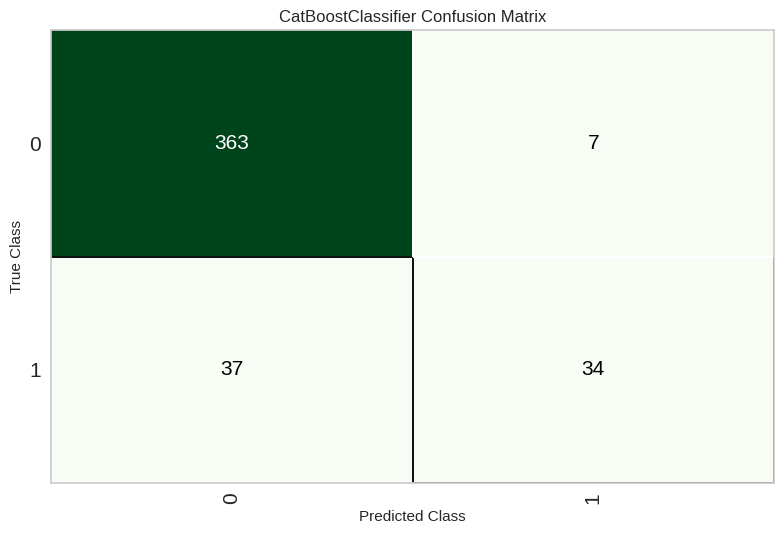

In [51]:
plot = plot_model(model, plot = 'confusion_matrix')

Ao analisarmos a Matriz de Confusão, O primeiro modelo teve muitos falsos negativos, apesar de ter uma acurácia maior, oque e um problema.

Vamos agora para o modelo tunado.

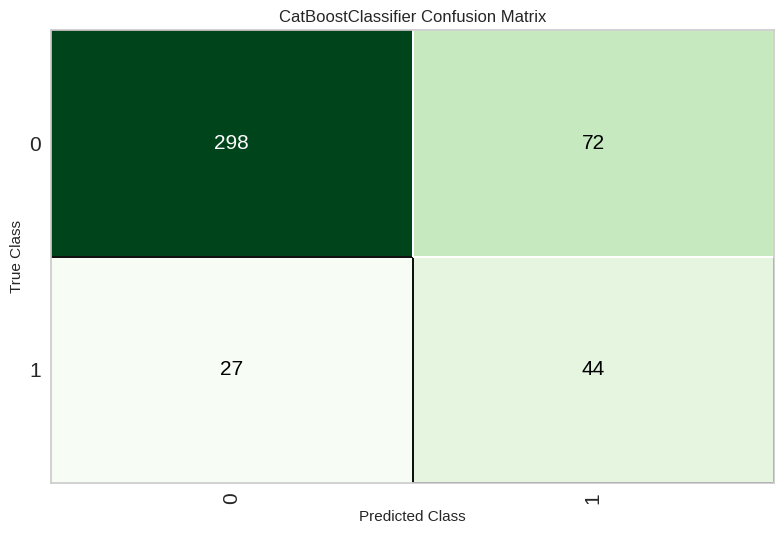

In [55]:
plot_tuned = plot_model(model_tuned, plot = 'confusion_matrix')

Já no modelo tunado, o número de falsos negativos caiu de 37 para 27, o que é uma melhora significativa. Porém, o número de falsos positivos aumentou muito, de 7 para 72, sendo este o motivo da acurácia ter caído bastante. Cabe uma análise mais profunda para avaliar se a melhora nas métricas de falso negativo compensam o grande aumento nos falsos positivos

In [54]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Saving features importantes.png to features importantes (4).png


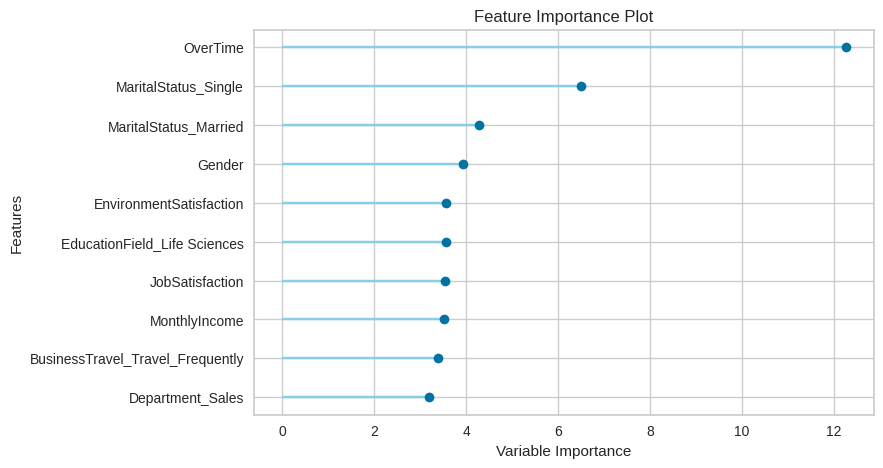

In [61]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()
Image('features importantes.png')

As features que tiveram mais importância foram: OverTime (Horas Extras), Estado Civil, Gênero e Satisfação. Note que as horas extras tiveram um impacto gigante em nosso modelo, demonstrando que pessoas que fazem muita hora extra tendem a sair da empresa

## Conclusões

Podemos concluir que o turnover, ou taxa de rotatividade de funcionários, é um fenômeno complexo que pode ser abordado eficazmente com técnicas de machine learning. Utilizando a biblioteca Pycaret, exploramos diversos modelos e identificamos que o CatBoostClassifier se destacou, apresentando uma acurácia de aproximadamente 86% e uma precisão de 70%.

No entanto, ao tentar otimizar o modelo através do ajuste de hiperparâmetros, observamos uma deterioração em certas métricas, como a acurácia, devido a um aumento nos falsos positivos. Isso ressalta a importância de uma análise cuidadosa das trocas entre diferentes métricas de desempenho ao ajustar modelos de machine learning.

Além disso, identificamos que algumas características dos funcionários, como horas extras, estado civil, gênero e satisfação, desempenham um papel significativo na previsão do turnover. Especificamente, a variável de horas extras demonstrou ter um impacto substancial, sugerindo que funcionários que trabalham em excesso podem ser mais propensos a deixar a empresa.

Essas descobertas fornecem insights valiosos para as empresas interessadas em reduzir o turnover e melhorar o ambiente de trabalho. Estratégias direcionadas para mitigar os fatores associados à saída de funcionários, como políticas de gestão de tempo e programas de bem-estar, podem ser implementadas com base nessas análises. No entanto, é crucial realizar uma avaliação contínua do modelo e considerar cuidadosamente as implicações de negócios ao tomar decisões com base em suas previsões.
